<a href="https://colab.research.google.com/github/Panchagiri-vidyasri/data-analysis-using-python_2116/blob/main/DAUP_PROJECT(Images)24_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data  

In [ ]:
dataset_path = "/content/drive/MyDrive/images"
train_path = "/content/drive/MyDrive"
val_path = "/content/drive/MyDrive"
for folder in [train_path, val_path]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Get class names (subfolders)
classes = os.listdir(dataset_path)

# Split and move images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # Split dataset (80% Train, 20% Validation)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class directories
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

    # Move images
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_path, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_path, class_name, img))

print("Dataset split completed!")


Dataset split completed!


In [ ]:
data_dir_train = '/content/drive/MyDrive/art and culture'
data_dir_test = '/content/drive/MyDrive/art and culture'


In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths (Ensure these paths are correct)
data_dir_train = '/content/drive/MyDrive/images'
data_dir_test = '/content/drive/MyDrive/images'

# Define parameters
batch_size = 32
img_size = (256, 256)

# Load training dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

# Load testing dataset
test_ds = image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

print("Dataset loaded successfully!")


Found 3021 files belonging to 3 classes.
Found 3021 files belonging to 3 classes.
Dataset loaded successfully!


Step 4: Visualize a Batch of Data

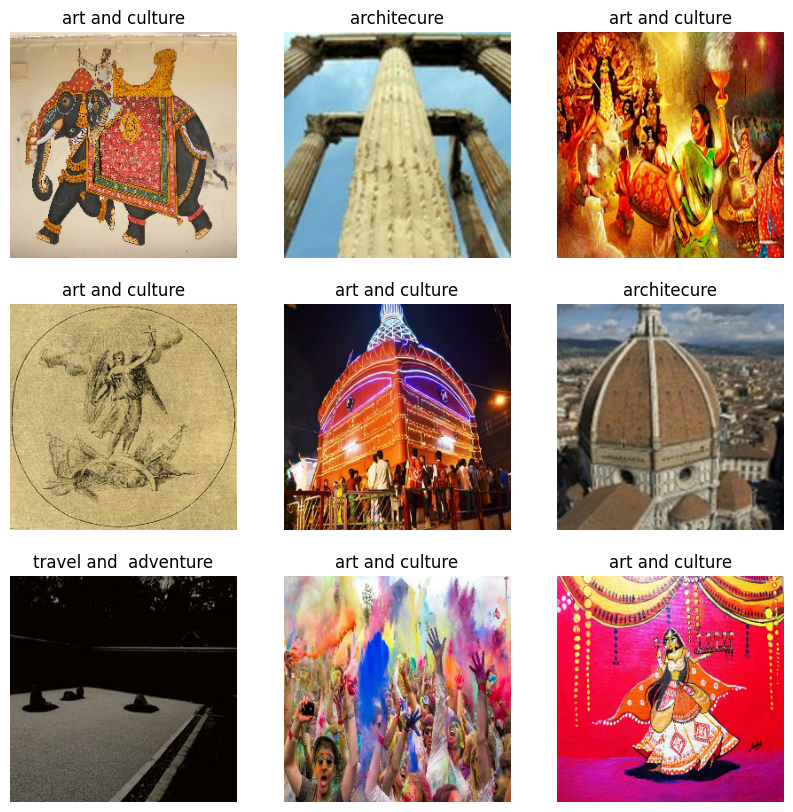

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")


Step 5: Optimize the Dataset for Training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dataset_path = "/content/drive/MyDrive/images"
BATCH_SIZE = 32
IMG_HEIGHT_256 = 256
IMG_WIDTH_256 = 256
IMG_HEIGHT_200 = 200
IMG_WIDTH_200 = 200


train_rgb_generator_256 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_256, IMG_WIDTH_256),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

train_rgb_generator_200 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_200, IMG_WIDTH_200),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

Found 2417 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.


Found 2417 images belonging to 3 classes.
Found 604 images belonging to 3 classes.


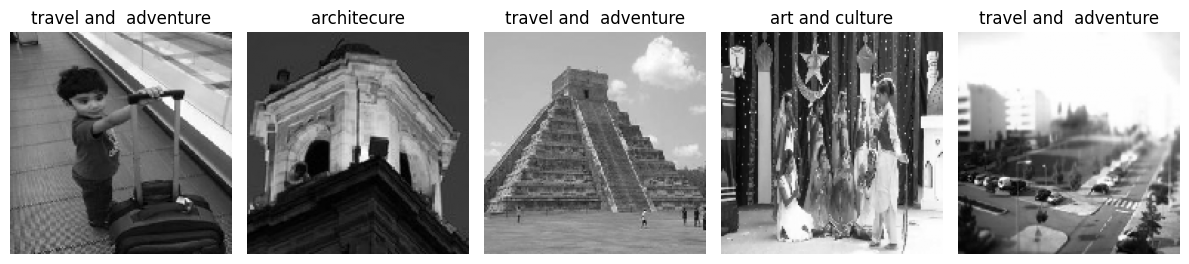

In [ ]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

gray_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gray_generator = gray_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_gray_generator = gray_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

def display_gray_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        label_index = np.argmax(labels[i])
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_gray_images(train_gray_generator, num_images=5)

Found 2417 images belonging to 3 classes.


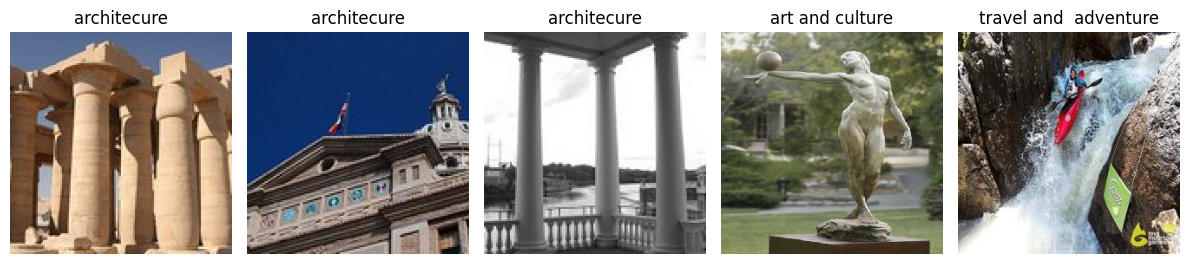

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32

dataset_path = "/content/drive/MyDrive/images"

rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_rgb_generator = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

def display_rgb_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        label_index = labels[i].argmax()
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_rgb_images(train_rgb_generator, 5)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(len(class_names), activation='softmax') # Output layer should have the same number of neurons as classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,509,955 (120.20 MB)

 Trainable params: 31,509,955 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 532s 6s/step - accuracy: 0.4971 - loss: 655.4312 - val_accuracy: 0.7521 - val_loss: 0.8489
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 539s 5s/step - accuracy: 0.7274 - loss: 0.7632 - val_accuracy: 0.8385 - val_loss: 0.5566
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 524s 6s/step - accuracy: 0.7876 - loss: 0.6186 - val_accuracy: 0.8954 - val_loss: 0.3648
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 571s 6s/step - accuracy: 0.8558 - loss: 0.4263 - val_accuracy: 0.9073 - val_loss: 0.3002
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 532s 6s/step - accuracy: 0.8784 - loss: 0.3625 - val_accuracy: 0.9427 - val_loss: 0.1969
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 526s 5s/step - accuracy: 0.9074 - loss: 0.3104 - val_accuracy: 0.9444 - val_loss: 0.1930
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 503s 5s/step - accuracy: 0.9012 - loss: 0.2830 - val_accuracy: 0.9649 - val_loss: 0.1019
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 577s 5s/step - accuracy: 0.9421 - loss: 0.1620 - val_accuracy: 0.9791 -

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9906 - loss: 0.0432
Test Loss: 0.03876255825161934
Test Accuracy: 0.9917246103286743


Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


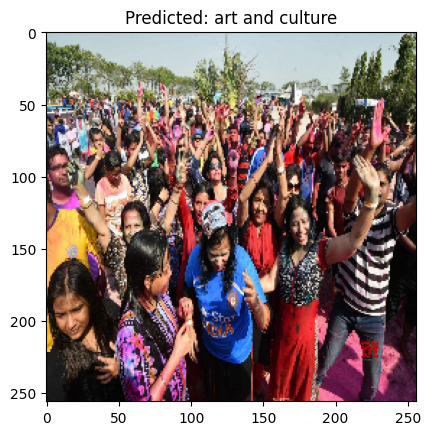

In [ ]:
# Save the model
model.save('cnn_model.h5')
print("Model saved successfully!")

# Predict on a batch of test images
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {class_names[tf.argmax(predictions[1]).numpy()]}")
    plt.show()
